## Numerical Experiment 1: Parameter estimation for LDA

In [1]:
# Import libraries
import tqdm
import math
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.special import digamma, polygamma
inverse = lambda X: np.linalg.inv(X)

In [2]:
# Import implemented functions
from lda import VariationalInference, ParameterEstimation
from utils import discreteNormal, discretePoisson

In [8]:
# Data generation parameter for sub-experiment 1
np.random.seed(17)
K  = 3
P  = 10
M  = 100
N  = 100
words = list(range(10))
alpha = np.array([0.5, 0.7, 0.7])
dist0 = discreteNormal(P, 4.5, np.sqrt(1.))
dist1 = discretePoisson(P, 1., reverse = False)
dist2 = discretePoisson(P, 1., reverse = True)
beta  = np.vstack([dist0, dist1, dist2])

In [9]:
# Check parameter
print(alpha)
print(beta)

[0.5 0.7 0.7]
[[9.05746644e-10 2.69999269e-06 1.08925479e-03 5.94712967e-02
  4.39436748e-01 4.39436748e-01 5.94712967e-02 1.08925479e-03
  2.69999269e-06 9.05746644e-10]
 [3.67879482e-01 3.67879482e-01 1.83939741e-01 6.13132470e-02
  1.53283118e-02 3.06566235e-03 5.10943725e-04 7.29919607e-05
  9.12399509e-06 1.01377723e-06]
 [1.01377723e-06 9.12399509e-06 7.29919607e-05 5.10943725e-04
  3.06566235e-03 1.53283118e-02 6.13132470e-02 1.83939741e-01
  3.67879482e-01 3.67879482e-01]]


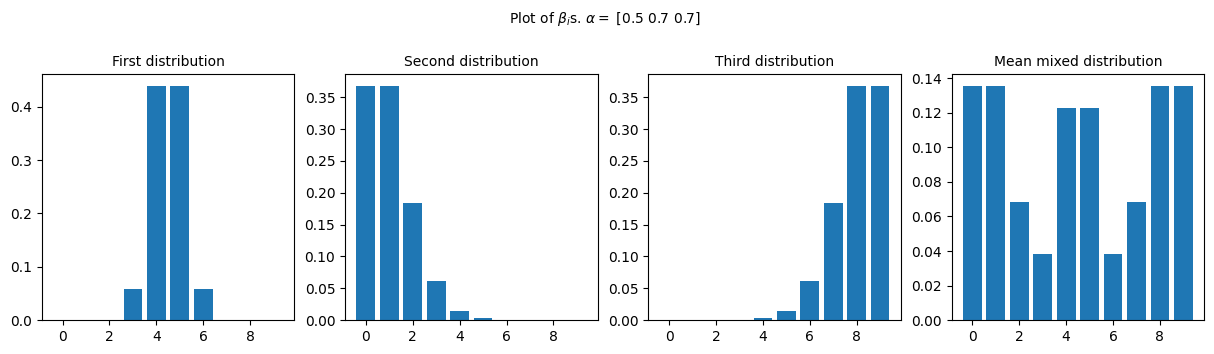

In [11]:
# Plot beta
fig, ax = plt.subplots(1, 4, figsize=(15, 3.2))
ax[0].bar(words, dist0)
ax[0].set_title('First distribution', fontsize=10)
ax[1].bar(words, dist1)
ax[1].set_title('Second distribution', fontsize=10)
ax[2].bar(words, dist2)
ax[2].set_title('Third distribution', fontsize=10)
ax[3].bar(words, alpha @ beta / np.sum(alpha))
ax[3].set_title('Mean mixed distribution', fontsize=10)
fig.suptitle(r'Plot of $\beta_i$s. $\alpha=$ ' + str(alpha), fontsize=10, y=1.08)
plt.show()

In [12]:
# Data generation for sub-experiment 1
dataset = []
for _ in range(M):
    theta = np.random.dirichlet(alpha) @ beta
    dataset.append(np.random.choice(P, N, p=theta, replace=True))

In [13]:
# Sneak peak
dataset[0]

array([0, 1, 9, 0, 8, 9, 0, 5, 2, 3, 2, 1, 1, 3, 1, 8, 1, 0, 0, 0, 7, 1,
       0, 8, 3, 0, 2, 0, 6, 0, 1, 9, 8, 0, 9, 6, 7, 7, 9, 0, 8, 8, 8, 0,
       1, 1, 2, 2, 0, 9, 0, 3, 3, 9, 0, 0, 9, 0, 8, 8, 8, 9, 1, 1, 1, 7,
       0, 6, 8, 7, 8, 1, 0, 1, 7, 0, 2, 2, 5, 0, 3, 9, 2, 3, 9, 8, 2, 0,
       8, 7, 7, 8, 7, 1, 2, 8, 8, 1, 0, 2])

In [14]:
np.random.seed(17)
alpha_hat, beta_hat = ParameterEstimation(dataset, K, P, num_iter_VI=10, num_iter_NR=3, num_iter_EM=50)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:23<00:00,  2.12it/s]


In [15]:
print(alpha_hat)
print(beta_hat)

[0.59398373 0.83510149 0.76037809]
[[1.99951044e-04 1.89438074e-04 1.34560668e-03 5.97298814e-02
  4.42513978e-01 4.20866049e-01 7.24329518e-02 1.52125032e-03
  6.61540851e-04 5.39352007e-04]
 [1.18454610e-09 5.05392606e-08 2.71901337e-06 2.04689086e-04
  7.29055017e-05 6.07406638e-03 5.68623883e-02 1.90266726e-01
  3.83445662e-01 3.63070792e-01]
 [3.70917597e-01 3.83514265e-01 1.83952343e-01 5.20165158e-02
  6.26343780e-03 9.15228345e-06 4.55893674e-06 9.65766576e-06
  6.18751582e-04 2.69372091e-03]]


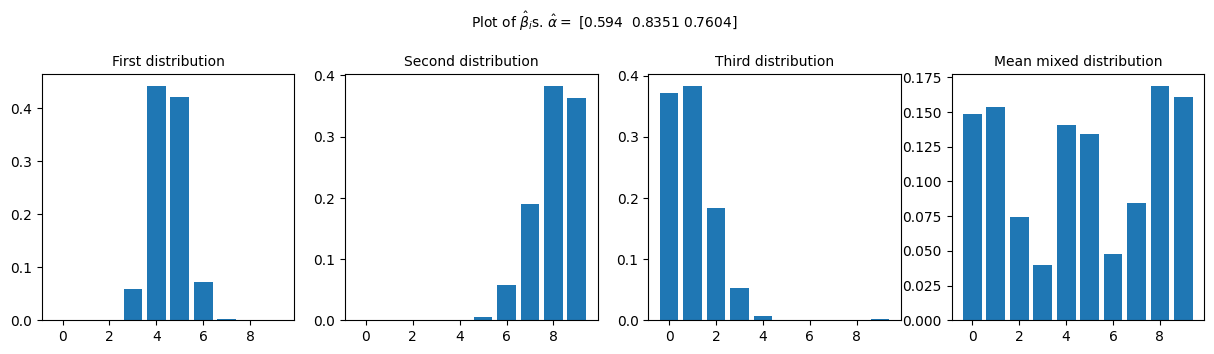

In [16]:
# Plot beta_hat
fig, ax = plt.subplots(1, 4, figsize=(15, 3.2))
ax[0].bar(words, beta_hat[0])
ax[0].set_title('First distribution', fontsize=10)
ax[1].bar(words, beta_hat[1])
ax[1].set_title('Second distribution', fontsize=10)
ax[2].bar(words, beta_hat[2])
ax[2].set_title('Third distribution', fontsize=10)
ax[3].bar(words, alpha_hat @ beta_hat / np.sum(alpha))
ax[3].set_title('Mean mixed distribution', fontsize=10)
fig.suptitle(r'Plot of $\hat\beta_i$s. $\hat\alpha=$ ' + str(np.round(alpha_hat, 4)), fontsize=10, y=1.08)
plt.show()

In [17]:
# Repeat the experiment with a more complex dataset with 4 topics (sub-experiment 2)
np.random.seed(17)
K  = 4
P  = 10
M  = 100
N  = 100
alpha = np.array([0.5, 0.5, 0.8, 0.8])
dist0 = discreteNormal(P, 3.4, np.sqrt(1.))
dist1 = discreteNormal(P, 5.6, np.sqrt(1.))
dist2 = discretePoisson(P, 1., reverse = False)
dist3 = discretePoisson(P, 1., reverse = True)
beta  = np.vstack([dist0, dist1, dist2, dist3])

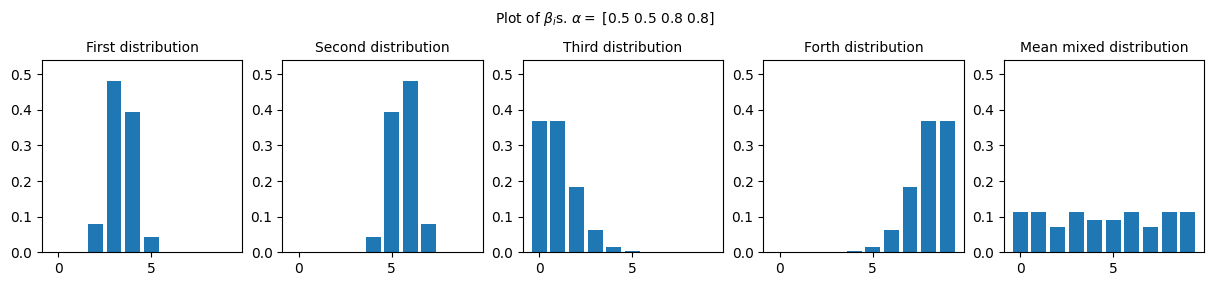

In [31]:
# Plot beta
fig, ax = plt.subplots(1, 5, figsize=(15, 2.5))
for a in ax.flat:
    a.set_ylim(top=0.54)
ax[0].bar(words, dist0)
ax[0].set_title('First distribution', fontsize=10)
ax[1].bar(words, dist1)
ax[1].set_title('Second distribution', fontsize=10)
ax[2].bar(words, dist2)
ax[2].set_title('Third distribution', fontsize=10)
ax[3].bar(words, dist3)
ax[3].set_title('Forth distribution', fontsize=10)
ax[4].bar(words, alpha @ beta / np.sum(alpha))
ax[4].set_title('Mean mixed distribution', fontsize=10)
fig.suptitle(r'Plot of $\beta_i$s. $\alpha=$ ' + str(alpha), fontsize=10, y=1.08)
plt.savefig('exp1_plot1.jpg', bbox_inches='tight', format='jpeg')
plt.show()

In [19]:
# Data generation for sub-experiment 2
dataset = []
for _ in range(M):
    theta = np.random.dirichlet(alpha) @ beta
    dataset.append(np.random.choice(P, N, p=theta, replace=True))

In [20]:
alpha_hat, beta_hat = ParameterEstimation(dataset, K, P, num_iter_VI=10, num_iter_NR=3, num_iter_EM=100)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.78it/s]


In [15]:
print(alpha_hat)
print(beta_hat)

[1.0467497  0.89431343 0.81504899 0.78615297]
[[3.82780027e-01 3.95132484e-01 2.00298029e-01 1.78831347e-02
  2.40179387e-05 3.76556735e-03 1.16614360e-04 8.30759811e-08
  8.06236783e-12 4.28942083e-08]
 [6.02302194e-06 3.16861792e-04 2.31162010e-05 1.89521527e-09
  2.97209183e-02 3.87681682e-01 4.95534588e-01 8.67147320e-02
  4.90569650e-11 2.07676480e-06]
 [1.45079563e-04 5.45285660e-06 3.63846082e-03 2.70597967e-08
  3.72829271e-04 2.29809118e-07 2.03599119e-02 1.84229941e-01
  3.95424350e-01 3.95823718e-01]
 [2.40540417e-07 1.19465449e-02 5.90669079e-02 5.25690980e-01
  3.82840094e-01 2.03583890e-02 2.12516755e-05 6.66461516e-05
  1.02094328e-08 8.93602524e-06]]


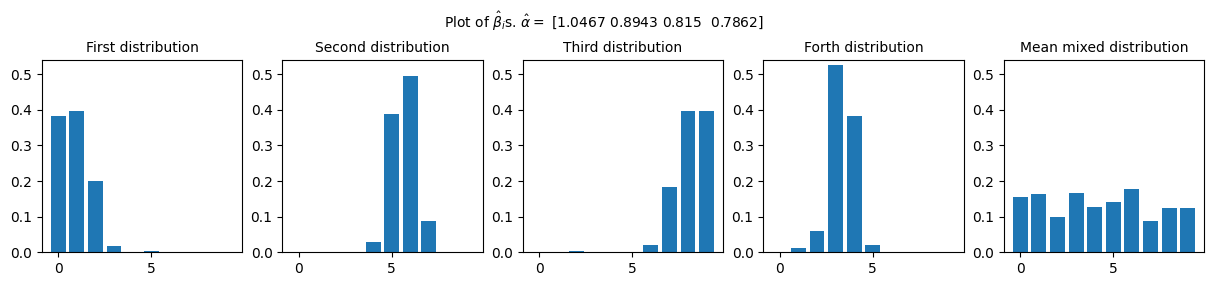

In [30]:
# Plot beta_hat
fig, ax = plt.subplots(1, 5, figsize=(15, 2.5))
for a in ax.flat:
    a.set_ylim(top=0.54)
ax[0].bar(words, beta_hat[0])
ax[0].set_title('First distribution', fontsize=10)
ax[1].bar(words, beta_hat[1])
ax[1].set_title('Second distribution', fontsize=10)
ax[2].bar(words, beta_hat[2])
ax[2].set_title('Third distribution', fontsize=10)
ax[3].bar(words, beta_hat[3])
ax[3].set_title('Forth distribution', fontsize=10)
ax[4].bar(words, alpha_hat @ beta_hat / np.sum(alpha))
ax[4].set_title('Mean mixed distribution', fontsize=10)
fig.suptitle(r'Plot of $\hat\beta_i$s. $\hat\alpha=$ ' + str(np.round(alpha_hat, 4)), fontsize=10, y=1.08)
plt.savefig('exp1_plot2.jpg', bbox_inches='tight', format='jpeg')
plt.show()